Test notebook for glacier number 27 (Ausfonna basin 3)

In [461]:
import xarray as xr
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd

from netCDF4 import Dataset as netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from affine import Affine
import rasterio.features

## Marine Terminating Glaciers

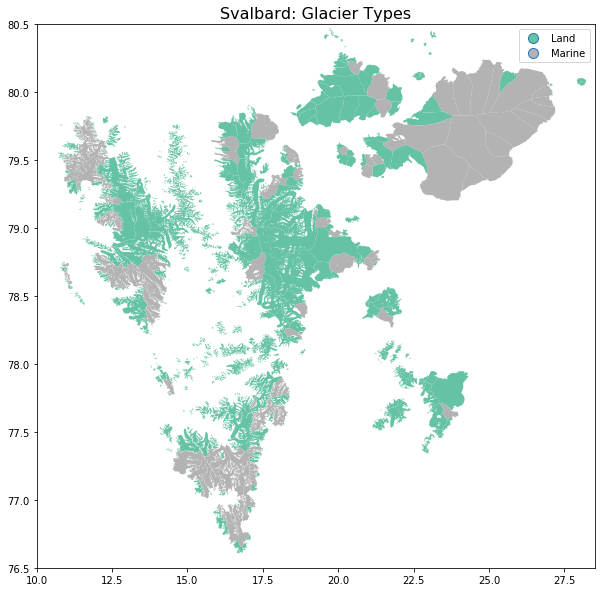

In [462]:
svalbard = gpd.read_file('/exports/csce/datastore/geos/groups/geos_EO/L0data/GLIMS/RGI_6.0/07_rgi60_Svalbard.shp')
fig, ax = plt.subplots(figsize = (10,10))
mylabels=['Land','Marine']
svalbard.plot(column = 'TermType', categorical = True,
                         figsize = (10,6), legend = True, 
                         markersize = 45,
                         cmap = "Set2", ax = ax)
leg = ax.get_legend()
for text, label in zip(leg.get_texts(),mylabels):
    text.set_text(label)

ax.set_xlim(10,28.5)
ax.set_ylim(76.5,80.5)
ax.set_title('Svalbard: Glacier Types', 
            fontsize = 16)
plt.savefig('Svalbard_rgi')

In [398]:
#Filter glacier index to make dataet of only marine terminating glaciers
#There are 141.

m_glaciers =svalbard.loc[lambda df: df['TermType'] > 0, :]
m_glaciers
#np.shape(m_glaciers)

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
5,RGI60-07.00006,G016429E76938N,20080901,-9999999,16.42890,76.9375,7,1,13.618,111,...,336,8187,0,0,0,1,0,9,Chomjakovbreen,"POLYGON ((16.40166962500007 76.96210198800003,..."
24,RGI60-07.00025,G023512E79401N,20010710,-9999999,23.51210,79.4014,7,1,1095.853,11,...,179,50954,0,0,1,1,3,0,Braasvellbreen,"POLYGON ((24.32905684300005 79.46528395200005,..."
25,RGI60-07.00026,G024447E79366N,20010710,-9999999,24.44700,79.3657,7,1,153.538,28,...,158,18363,0,0,1,1,0,9,Austfonna,"POLYGON ((24.94677230000008 79.36035267900007,..."
26,RGI60-07.00027,G024554E79593N,20010710,-9999999,24.55440,79.5931,7,1,1226.367,2,...,147,56487,0,0,1,1,2,0,Austfonna basin 3,"POLYGON ((24.88482226200006 79.71134161000003,..."
27,RGI60-07.00028,G025275E79607N,20010710,-9999999,25.27520,79.6073,7,1,249.109,48,...,140,23275,0,0,1,1,0,9,Austfonna,"POLYGON ((25.82040337000007 79.59365373200006,..."
28,RGI60-07.00029,G025601E79742N,20010710,-9999999,25.60100,79.7418,7,1,662.905,10,...,131,35861,0,0,1,1,0,9,Austfonna,"POLYGON ((26.60228538400003 79.71437734700004,..."
29,RGI60-07.00030,G026348E79807N,20010710,-9999999,26.34820,79.8072,7,1,175.992,1,...,123,19358,0,0,1,1,0,9,Austfonna,"POLYGON ((26.91630115100003 79.79210365300008,..."
30,RGI60-07.00031,G026607E79872N,20010710,-9999999,26.60740,79.8722,7,1,218.616,20,...,110,25966,0,0,1,1,0,9,Austfonna,"POLYGON ((27.16891700200006 79.89403572600008,..."
34,RGI60-07.00035,G021342E80037N,20080814,-9999999,21.34180,80.0371,7,1,224.739,16,...,30,23042,0,0,1,1,3,0,Rijpbreen,"POLYGON ((21.71819726300004 80.02621476600007,..."
35,RGI60-07.00036,G020565E80186N,20080814,-9999999,20.56520,80.1855,7,1,67.387,8,...,61,12195,0,0,1,1,0,9,Sabinebreen,"POLYGON ((20.61367886400006 80.21917291300008,..."


## dh/dt

In [406]:
#dhdt has been interpolated onto the rgi grid using matlab script used on MAR data
dhdt =xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/dhdt.nc')
mask = xr.open_rasterio('/exports/csce/datastore/geos/groups/geos_EO/L0data/GLIMS/RGI_6.0/Svalbard_Masks/uncorr/07_rgi60_Svalbard.tif')
mask= mask.transpose('band','x','y')
dhdt['mask'] =  (('lon','lat'),mask.values[0])

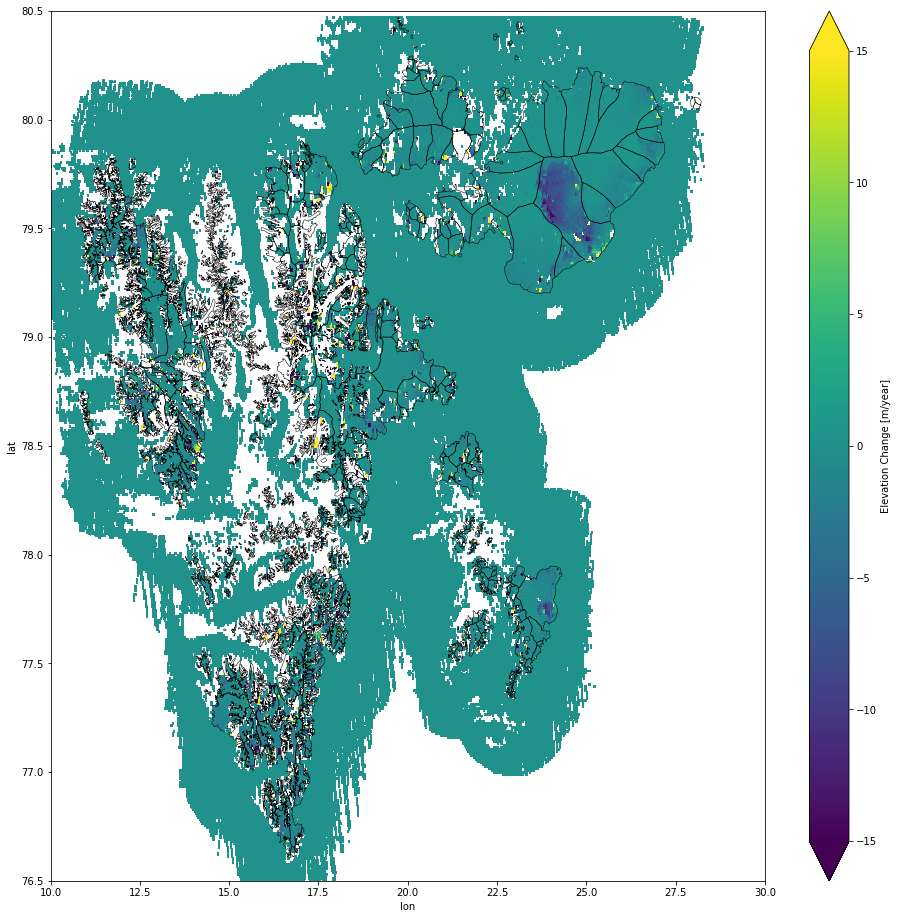

In [463]:
svalbard = gpd.read_file('/exports/csce/datastore/geos/groups/geos_EO/L0data/GLIMS/RGI_6.0/07_rgi60_Svalbard.shp')
fig, ax = plt.subplots(figsize = (16,16))

dhdt.rate.plot(x='lon',y='lat',vmin=-15,vmax=15)
svalbard.plot(ax=ax,color = 'None', edgecolor = 'black', linewidth = 0.5 )
ax.set_xlim(10,30)
ax.set_ylim(76.5,80.5)
plt.show()

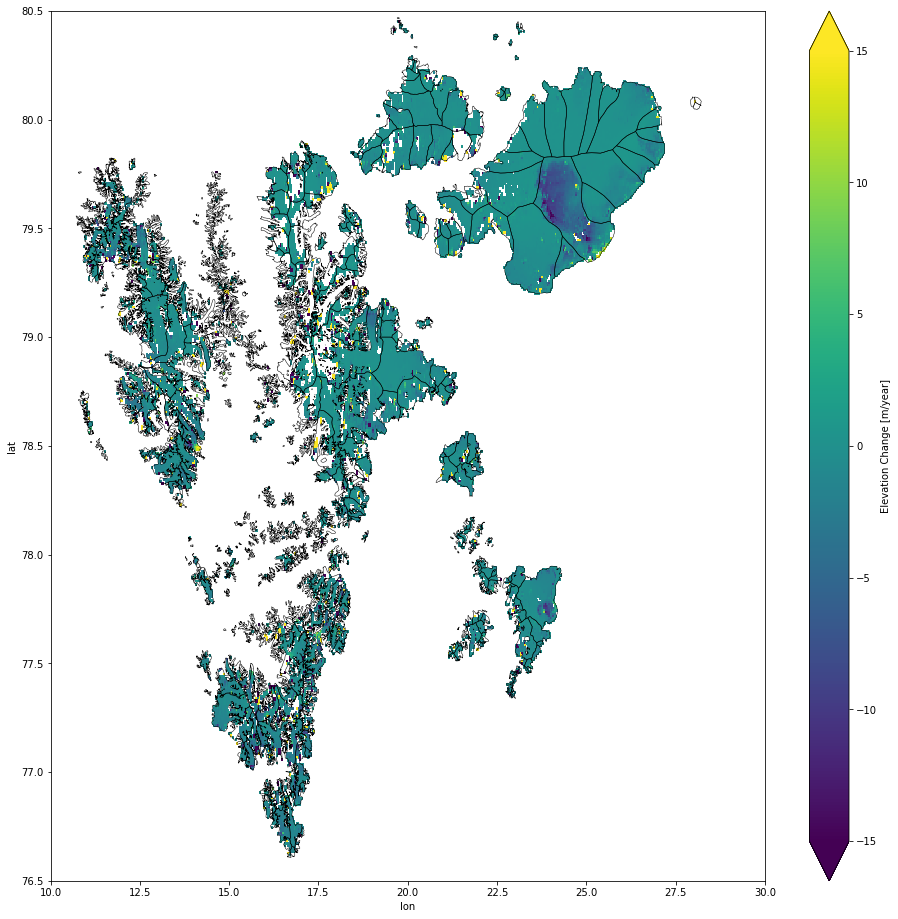

In [408]:
svalbard = gpd.read_file('/exports/csce/datastore/geos/groups/geos_EO/L0data/GLIMS/RGI_6.0/07_rgi60_Svalbard.shp')
fig, ax = plt.subplots(figsize = (16,16))

dhdt.rate.where(dhdt.mask==1).plot(x='lon',y='lat',vmin=-15,vmax=15)
svalbard.plot(ax=ax,color = 'None', edgecolor = 'black', linewidth = 0.5 )
ax.set_xlim(10,30)
ax.set_ylim(76.5,80.5)
plt.show()

## Bathymetry

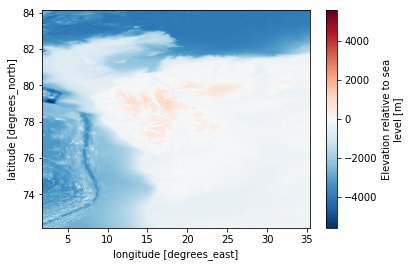

In [234]:
bath = xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/Bathymetry_Arctic/gebco_2020_n84.111328125_s72.158203125_w1.7578125_e35.33203125.nc')
bath.elevation.plot()

## Thickness

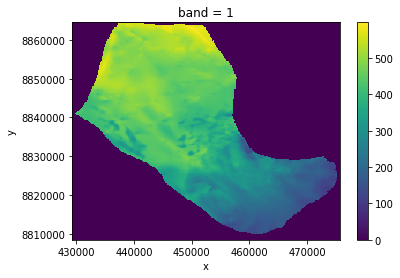

In [402]:
#Thickness have allready been clipped to the sepatre basins
#Note: RGI60-07.00027_thickness.tif is glacier index number 26 in the svalbard shapefile dataset.
thick = xr.open_rasterio('/exports/csce/datastore/geos/groups/geos_EO/Databases/Ice_Thickness/RGI60-07/RGI60-07.00027_thickness.tif')
thick.plot()

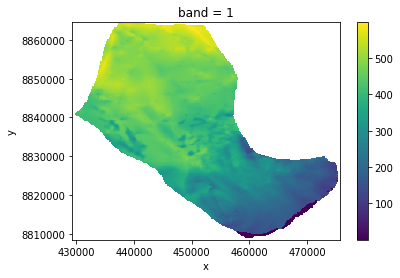

In [409]:
thick.where(thick>0).plot()

## DEM

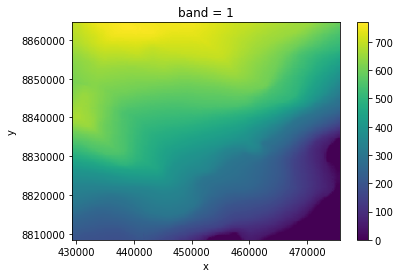

In [414]:
DEM = xr.open_rasterio('/exports/csce/datastore/geos/groups/geos_EO/Databases/Ice_Thickness/surface_DEMs_RGI60-07/surface_DEM_RGI60-07.00027.tif')
DEM.plot()

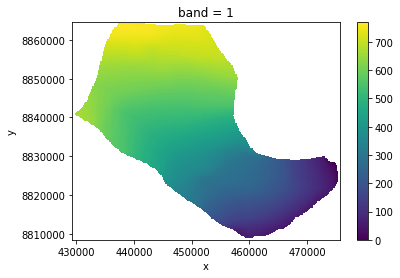

In [411]:
DEM_clipped=DEM.where(thick>0)
DEM_clipped.plot()


## Basal Topography

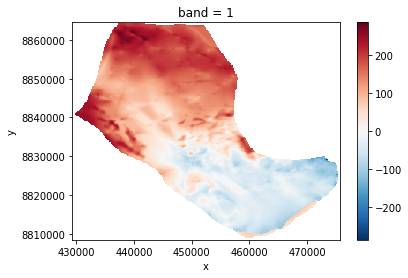

In [412]:
basal= DEM_clipped-thick
basal.plot()

## Glacier Mask (Drainage Basin)
#### used gdl_rasterize in command line, can be done within jupyte

In [ ]:
!gdal_rasterize -burn 1 -tr 0.036 0.009  -where "RGIId='RGI60-07.00026' AND O2Region='1'" 07_rgi60_Svalbard.shp 07_rgi60_basin3_MF.tif

(79, 80)

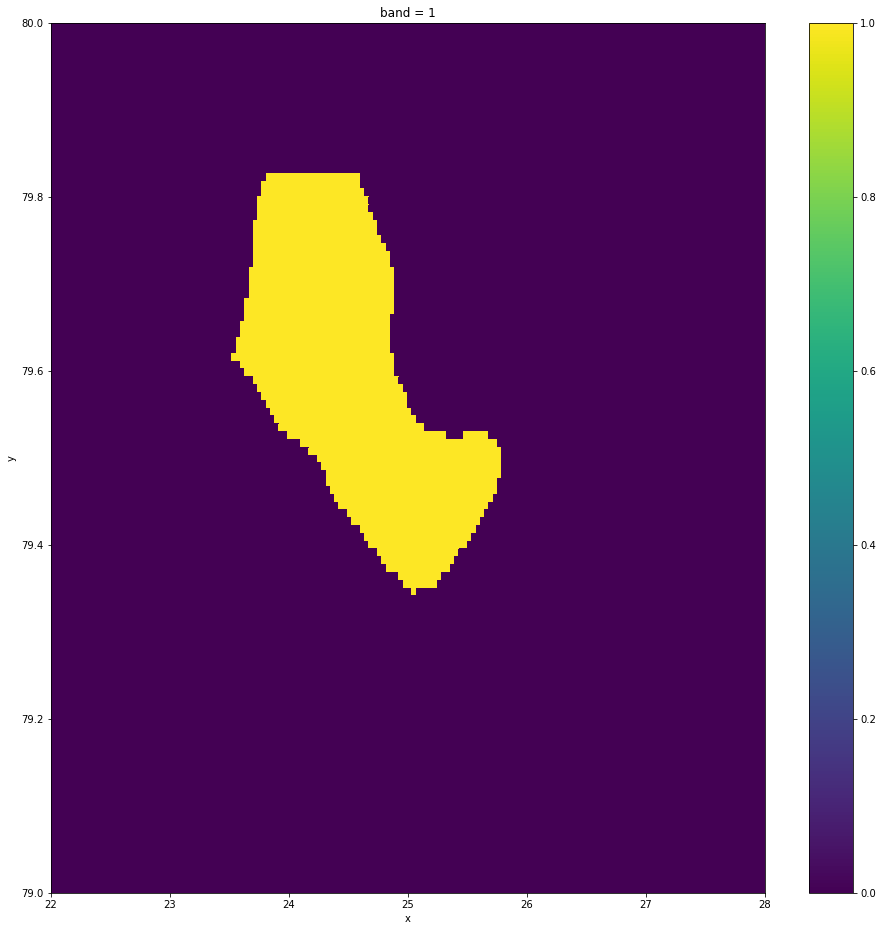

In [452]:
b3= xr.open_rasterio('/exports/csce/datastore/geos/groups/geos_EO/L0data/GLIMS/RGI_6.0/Svalbard_Masks/uncorr/07_rgi60_27_MF.tif')
fig, ax = plt.subplots(figsize = (16,16))
b3.plot()
ax.set_xlim(22,28)
ax.set_ylim(79,80)

## Grounding Line Depth


KeyError: 26

(79, 80)

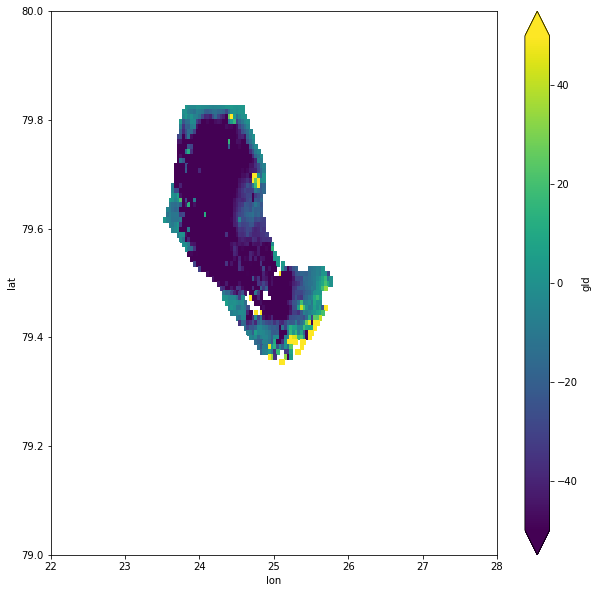

In [505]:
fig, ax = plt.subplots(figsize = (10,10))
dhdt.gld.where(dhdt.mask_27==1).plot(x='lon',y='lat',vmin=-50,vmax=50)
ax.set_xlim(22,28)
ax.set_ylim(79,80)

(79.34, 79.84)

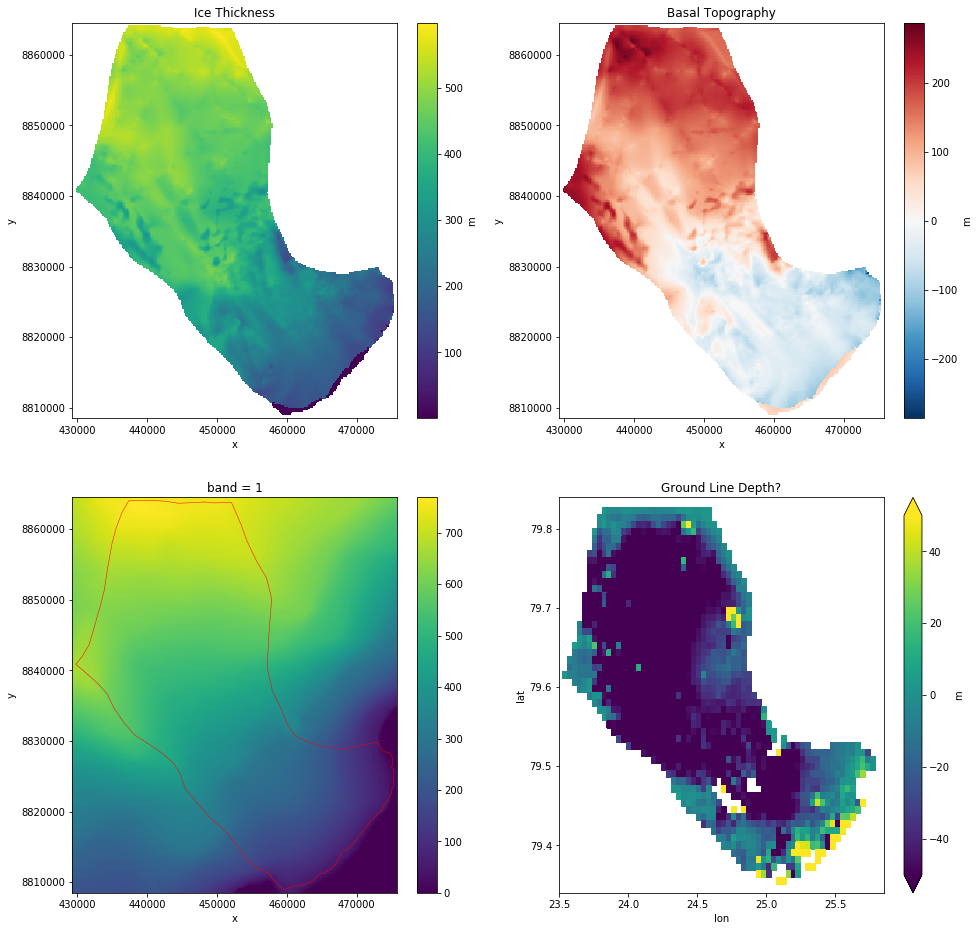

In [561]:
#Recall polygon outline to display on DEM
x = svalbard.loc[26,"geometry"]
from shapefile_functions import reprojpoly 
#reproj to DEM projection
x2=reprojpoly("epsg:4326","epsg:32635",x)

fig, axes = plt.subplots(ncols=2,nrows=2,figsize = (16,16))
thick.where(thick>0).plot(ax=axes[0,0], cbar_kwargs = {"label":"m"})
axes[0,0].set_title("Ice Thickness")


axes[1,0].set_title("DEM")
DEM.plot(ax=axes[1,0])
#option of fully masked DEM
#DEM_clipped.plot(ax=axes[1,0])
x2.plot(ax=axes[1,0],color = 'None', edgecolor = 'red', linewidth = 0.5 )

basal.plot(ax=axes[0,1], cbar_kwargs = {"label":"m"})
axes[0,1].set_title("Basal Topography")

dhdt.gld.where(dhdt.mask_27==1).plot(ax=axes[1,1],x='lon',y='lat',vmin=-50,vmax=50, cbar_kwargs= {"label":"m"})
axes[1,1].set_title("Ground Line Depth?")
axes[1,1].set_xlim([23.5,25.85])
axes[1,1].set_ylim([79.34,79.84])

## Thermal Forcing

In [395]:
TF = xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/ASTE/THETA.0011.nc')
TF["THETA"]=TF.THETA.where(TF.land==1)
TF

<xarray.Dataset>
Dimensions:  (i1: 192, i2: 50, i3: 90, i4: 90)
Coordinates:
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 ... 188.0 189.0 190.0 191.0 192.0
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i4       (i4) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    lon      (i3, i4) float64 ...
    lat      (i3, i4) float64 ...
    dep      (i2) float64 ...
    tim      (i1) datetime64[ns] ...
Data variables:
    THETA    (i1, i2, i3, i4) float32 4.3755727 4.1392417 3.9671235 ... nan nan
    timstep  (i1) float64 ...
    land     (i2, i3, i4) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    area     (i3, i4) float64 ...
    thic     (i2) float64 ...
Attributes:
    Description:     Arctic Subpolar Gyre sTate Estimate (ASTE) release 1
    Institution:     Oden Institute for Computational Engineering and Science...
    References:        
    01:                 Nguyen, A.T., H. Pillar, V. Ocana, A. Bigdeli, T.A. S...
    02:                 The Arctic Subpolar gyre sTate Estimate (ASTE): Descr...
    03:                 J. Adv. Model Earth Syst.
    Conventions:     CF-1.6 (http://cfconventions.org/cf-conventions/v1.6.0/c...
    Software:        File created using convert_ASTE2nctiles_DIAG.m
    netCDF Version:  4.7.3
    matlab Version:  9.9.0.1467703 (R2020b)
    _FillValue:      nan
    missing_value:   nan

(78.8, 79.6)

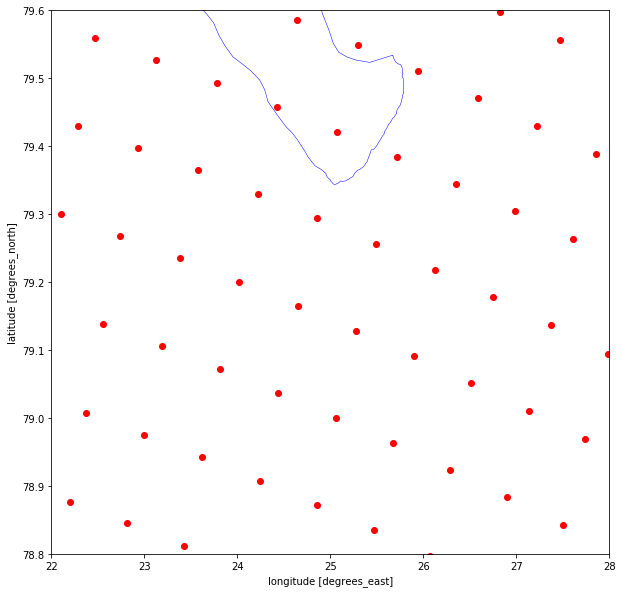

In [498]:
x = svalbard.loc[26,"geometry"]
p = gpd.GeoSeries(x)
fig, ax = plt.subplots(figsize = (10,10))
p.plot(ax=ax,color = 'None', edgecolor = 'blue', linewidth = 0.5 )
TF.plot.scatter(x='lon',y='lat',color='r')
ax.set_xlim(22,28)
ax.set_ylim(78.8,79.6)

(79, 80)

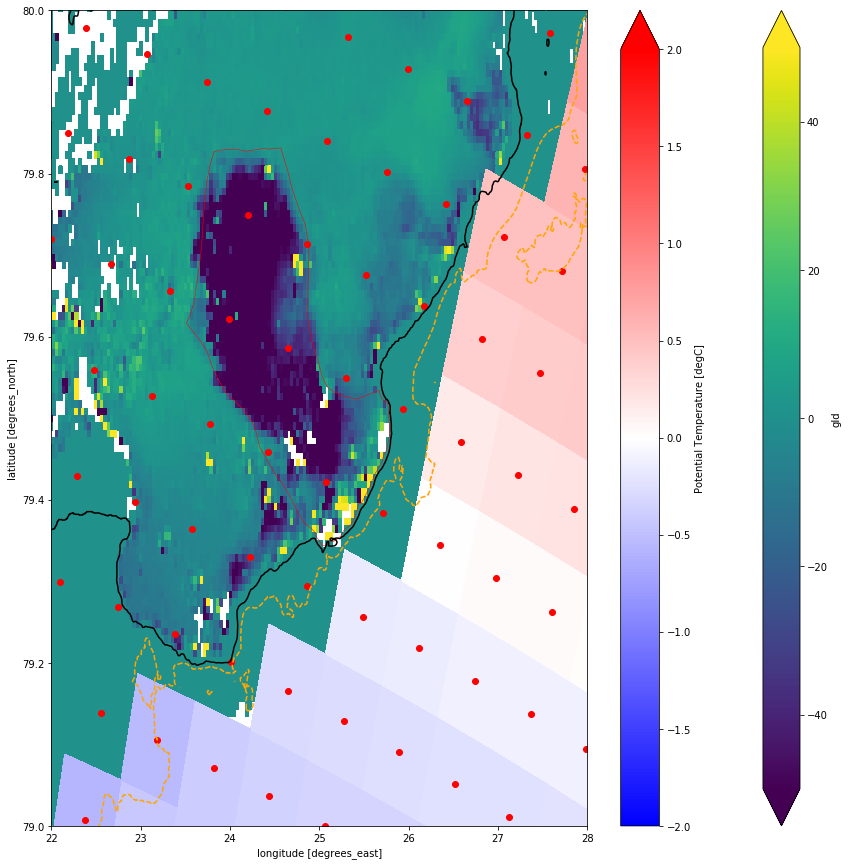

In [508]:
x = svalbard.loc[26,"geometry"]
p = gpd.GeoSeries(x)
fig, ax = plt.subplots(figsize = (15,15))
dhdt.gld.plot(x='lon',y='lat',vmin=-50,vmax=50)
TF.THETA[0][7].plot(ax=ax, x='lon',y='lat',vmin=-2,vmax=2, cmap = "bwr")
bath.elevation.plot.contour(ax=ax,levels = [0],colors= 'black')
bath.elevation.plot.contour(ax=ax,levels = [-75.005],colors= 'orange')
TF.plot.scatter(x='lon',y='lat',color='r')

p.plot(ax=ax,color = 'None', edgecolor = 'red', linewidth = 0.5 )
ax.set_xlim(22,28)
ax.set_ylim(79,80)

(78.8, 79.6)

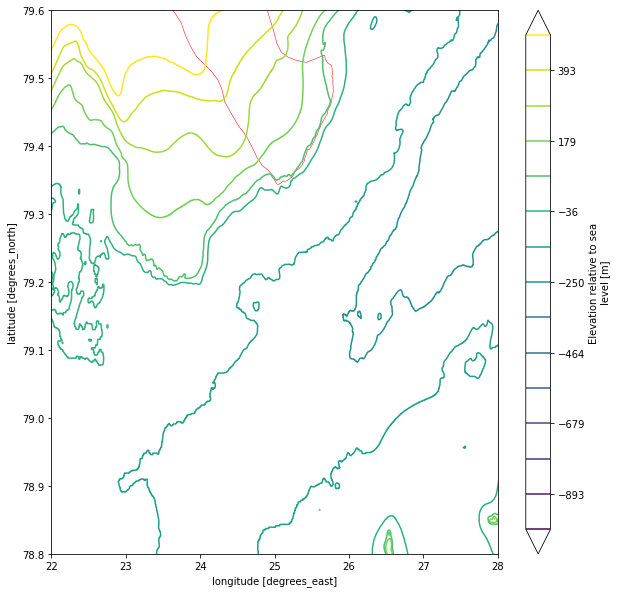

In [509]:
x = svalbard.loc[26,"geometry"]
p = gpd.GeoSeries(x)
fig, ax = plt.subplots(figsize = (10,10))
bath.elevation.plot.contour(ax=ax,vmin=-1000,vmax=500, add_colorbar=True, levels = 15)
p.plot(ax=ax,color = 'None', edgecolor = 'red', linewidth = 0.5 )
ax.set_xlim(22,28)
ax.set_ylim(78.8,79.6)


## Basal Discharge

### Ice velocity

In [75]:
v= xr.open_rasterio('/exports/csce/datastore/geos/groups/geos_EO/Databases/ITS_LIVE/Svalbard_Russian_Arctic/SRA_G0240_2018_v.tif')


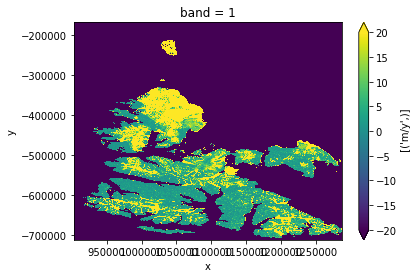

In [28]:
v_y =v[dict(y=slice(5250,7520))]
v_yx = v_y[dict(x=slice(1300,2900))]
v_yx.plot(vmin=-20,vmax=20)

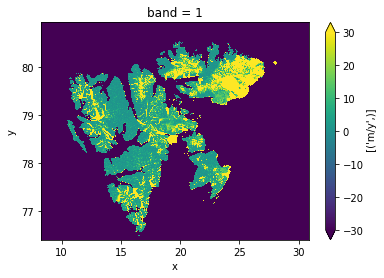

In [147]:
reproj_v= xr.open_rasterio('/exports/csce/datastore/geos/groups/geos_EO/Databases/ITS_LIVE/Svalbard_Russian_Arctic/output.tif')
reproj_v_y =reproj_v[dict(y=slice(400,900))]
reproj_v_yx = reproj_v_y[dict(x=slice(1500,4000))]
reproj_v_yx.plot(vmin=-30,vmax=30)
#reproj_v_yx.squeeze().plot.imshow(vmin=-30,vmax=30) for when data too big

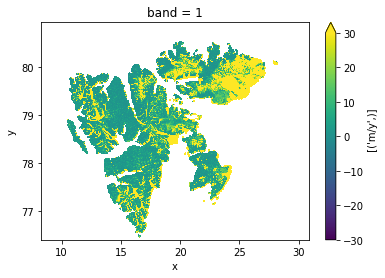

In [129]:
reproj_filtered =reproj_v_yx.where(reproj_v_yx != -32767)
reproj_filtered.plot(vmin=-30,vmax=30)

### Basal melt

In [132]:
#constants
tau = 150e3 # Pa
L =  3.34e5 # J/Kg
rho_i = 910 #Kg/m^3
rho_fw = 1000 # Kg/m^3

velocity = reproj_filtered / 86400 # m/s

basal = (rho_i/rho_fw)*tau*velocity/(rho_i*L) # mwe/s

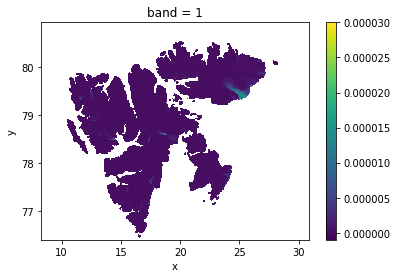

In [135]:
basal.plot(vmin=-.000001,vmax=0.00003)

In [155]:
svalbard_ds = xr.open_rasterio('/exports/csce/datastore/geos/groups/geos_EO/L0data/GLIMS/RGI_6.0/Svalbard_Masks/uncorr/07_rgi60_Svalbard.tif')
basal_interp=basal.interp(y=svalbard_ds.y.values, x=svalbard_ds.x.values)

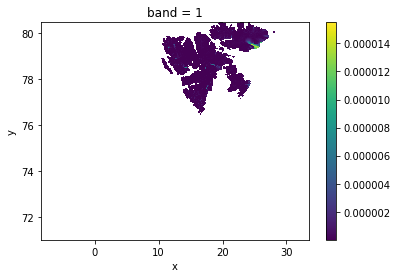

In [158]:
basal_interp.plot()


In [205]:
basal_interp["mask"]=(('y','x'),b3.values[0]) # create mask of wanted basin to filter basal melt for spefici region
b=basal_interp.where(basal_interp.mask!=0).sum()# mwe/s 
basal_m = [float(b.values)]*4018

### Surface Runoff

In [218]:
surface_ro = xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/MeltModel/GlaciersRO.nc')
surface_ro.Glacier_26

<xarray.DataArray 'Glacier_26' (time: 4018)>
array([9.654448e-20, 9.660256e-20, 9.658161e-20, ..., 9.658163e-20,
       9.658161e-20, 9.658161e-20])
Coordinates:
  * time     (time) float64 1.218e+03 1.22e+03 1.22e+03 ... 1.582e+03 1.582e+03
Attributes:
    units:      mmWE/day
    long_name:  Run-off of meltwater and rain water

In [ ]:
time = pd.date_range('2010-01-01','2020-12-31')
basal_discharge_26 = xr.Dataset(data_vars =dict(surface_ro = (["time"], surface_ro.Glacier_26),basal_m = (["time"],basal_m)), coords = dict(time=time))
basal_discharge_26

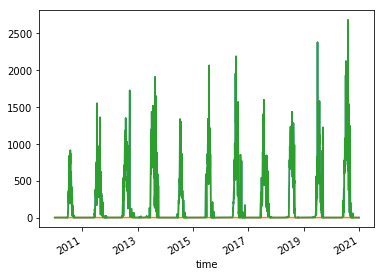

In [217]:
basal_discharge.surface_ro.plot()
basal_discharge.basal_m.plot()
(basal_discharge.surface_ro + basal_discharge.basal_m).plot()